# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
import lut

[  0  32  51  64  74  82  89  96 101 106 110 114 118 121 125 128 130 133
 135 138 140 142 144 146 148 150 152 153 155 156 158 159 161 162 163 165
 166 167 168 170 171 172 173 174 175 176 177 178 179 180 181 182 183 183
 184 185 186 187 188 188 189 190 191 191 192 193 193 194 195 195 196 197
 197 198 199 199 200 200 201 202 202 203 203 204 204 205 205 206 206 207
 207 208 208 209 209 210 210 211 211 212 212 213 213 214 214 214 215 215
 216 216 217 217 217 218 218 219 219 219 220 220 221 221 221 222 222 222
 223 223 223 224 224 225 225 225 226 226 226 227 227 227 228 228 228 229
 229 229 229 230 230 230 231 231 231 232 232 232 233 233 233 233 234 234
 234 235 235 235 235 236 236 236 236 237 237 237 238 238 238 238 239 239
 239 239 240 240 240 240 241 241 241 241 242 242 242 242 242 243 243 243
 243 244 244 244 244 245 245 245 245 245 246 246 246 246 247 247 247 247
 247 248 248 248 248 248 249 249 249 249 249 250 250 250 250 250 251 251
 251 251 251 252 252 252 252 252 253 253 253 253 25

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

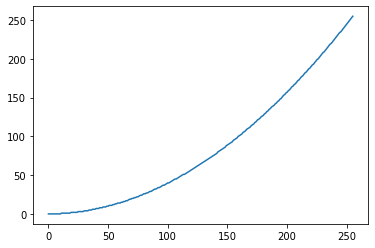

In [6]:
from matplotlib import pyplot as plt
plt.plot(lut.kwadratowa)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

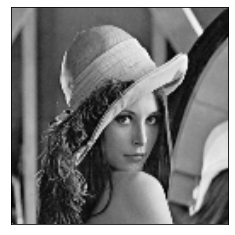

In [14]:
image_file = open('lena.bmp', 'rb')
image = plt.imread(image_file)

plt.xticks([]), plt.yticks([])
plt.imshow(image, cmap='gray')
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

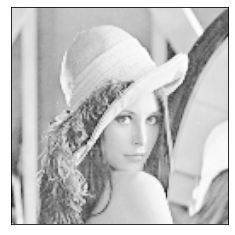

In [22]:
import cv2
processed = cv2.LUT(image, lut.log)
plt.xticks([]), plt.yticks([])
plt.imshow(processed, cmap='gray')
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

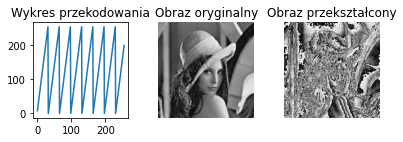

In [49]:
def LUT(image, lut_table):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        
    ax1.plot(lut_table)
    ax1.set_aspect('equal')
    ax1.set_title('Wykres przekodowania')
    
    ax2.imshow(image, cmap='gray')
    ax2.set_title('Obraz oryginalny')
    ax2.axis('off')
    
    ax3.imshow(cv2.LUT(image, lut_table), cmap='gray')
    ax3.set_title('Obraz przekształcony')
    ax3.axis('off')
    
    fig.tight_layout(pad=3.0)
    
LUT(image, lut.pila)

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

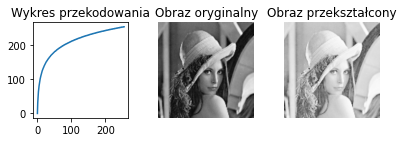

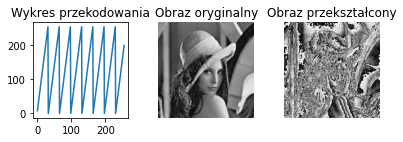

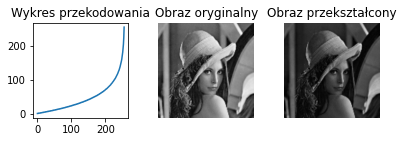

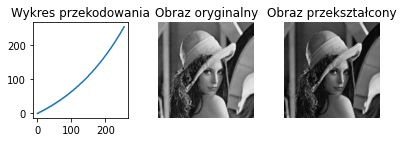

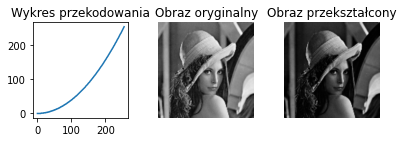

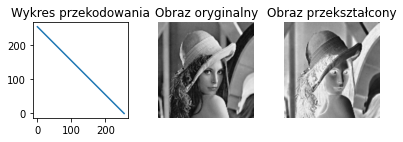

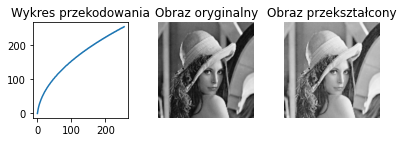

In [50]:
list = [lut.log, lut.pila, lut.odwlog, lut.wykladnicza, lut.kwadratowa, lut.odwrotna, lut.pierwiastkowa]

for _ in list:
    LUT(image, _)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

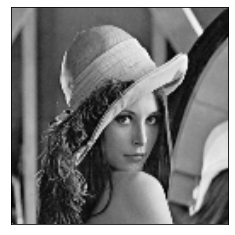

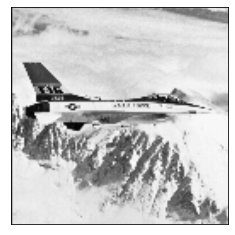

In [52]:
def display(bin):
    image = plt.imread(bin)

    plt.xticks([]), plt.yticks([])
    plt.imshow(image, cmap='gray')
    plt.show()

lena_bin = open('lena.bmp', 'rb')
jet_bin = open('jet.bmp', 'rb')

display(lena_bin)
display(jet_bin)




Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

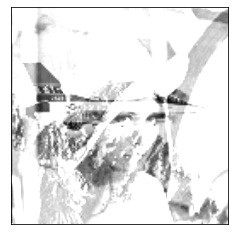

In [80]:
def display(img):
    plt.xticks([]), plt.yticks([])
    plt.imshow(img, cmap='gray')
    plt.show()


lena = plt.imread(lena_bin)
jet = plt.imread(jet_bin)
result = cv2.add(lena, jet)

display(result)


Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

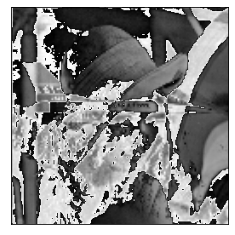

In [81]:
lena = plt.imread(lena_bin)
jet = plt.imread(jet_bin)

jet16 = jet.astype('uint16')
lena16 = lena.astype('uint16')
result16 = cv2.add(lena16, jet16)
result8 = result16.astype('uint8')

display(result8)

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

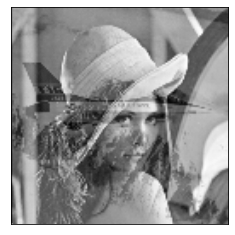

In [82]:
result = cv2.addWeighted(lena, 0.6, jet, 0.4, 0)

display(result)

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

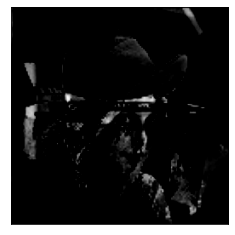

In [83]:
result = cv2.subtract(lena, jet)

display(result)

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

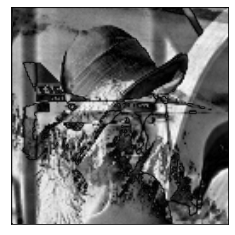

In [84]:
import numpy as np

lena_int16 = lena.astype('int16')
jet_int16 = jet.astype('int16')

result = np.abs(cv2.subtract(jet_int16, lena_int16))
display(result)

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

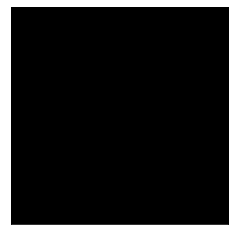

In [85]:
result = cv2.multiply(lena, jet)

display(result)

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

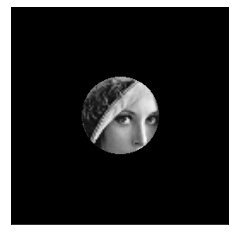

In [86]:
mask_bin = open('kolo.bmp', 'rb')
mask = plt.imread(mask_bin)

result = cv2.multiply(lena, (mask).astype('bool').astype('uint8'))
display(result)


### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

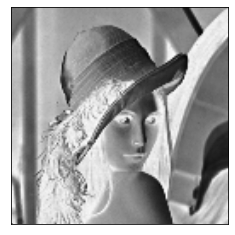

In [87]:
result = cv2.bitwise_not(lena)
display(result)

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

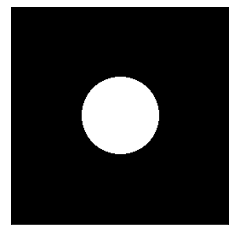

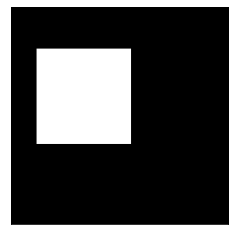

In [88]:
kolo = plt.imread(open('kolo.bmp', 'rb'))
kwadrat = plt.imread(open('kwadrat.bmp', 'rb'))

display(kolo)
display(kwadrat)


Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

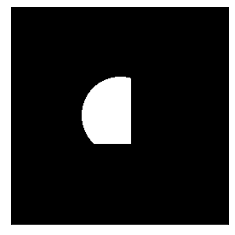

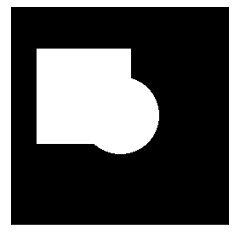

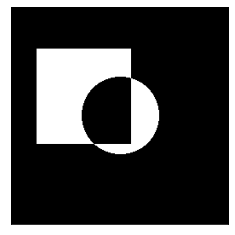

In [92]:
display(kolo & kwadrat)
display(kolo | kwadrat)
display(kolo ^ kwadrat)


## Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

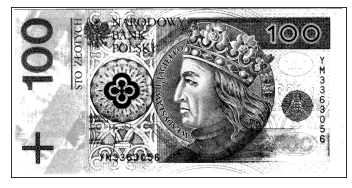

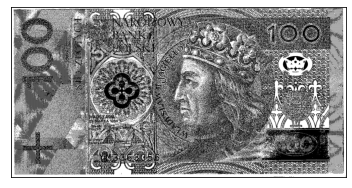

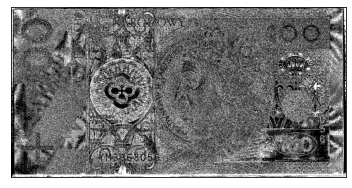

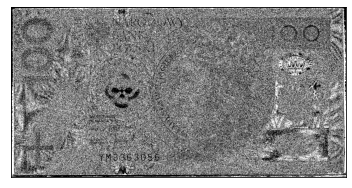

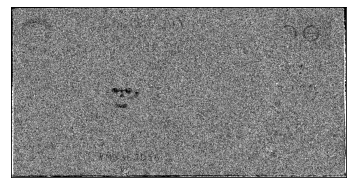

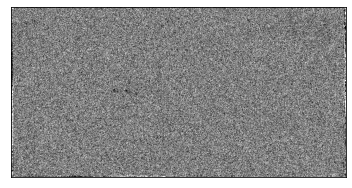

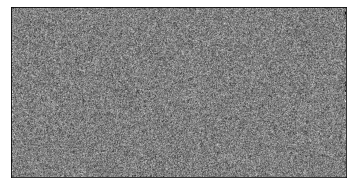

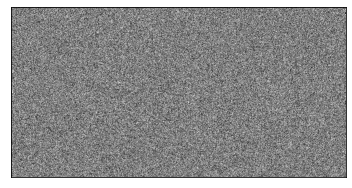

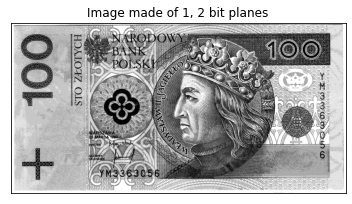

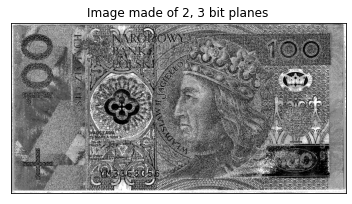

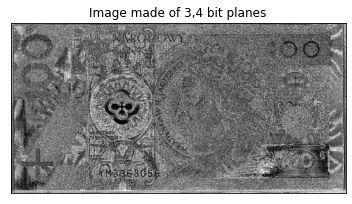

In [1]:
import math
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('100zloty.jpg', 0)

out = []
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        out.append(np.binary_repr(image[i][j], width=8))
        
SLICES_AMOUNT = 8
planes = []
for x in range(0, 8):
    p = SLICES_AMOUNT - x
    plane = (np.array([int(i[x]) for i in out], dtype=np.uint8) * math.pow(2, p)).reshape(image.shape[0], image.shape[1])
    planes.append(plane)
    
    plt.xticks([]), plt.yticks([])
    plt.imshow(plane, cmap='gray')
    plt.show()
    
    
new_img = planes[0] + planes[1]
plt.xticks([]), plt.yticks([])
plt.imshow(new_img, cmap='gray')
plt.title('Image made of 1, 2 bit planes')
plt.show()

new_img = planes[1] + planes[2]
plt.xticks([]), plt.yticks([])
plt.imshow(new_img, cmap='gray')
plt.title('Image made of 2, 3 bit planes')
plt.show()

new_img = planes[2] + planes[3]
plt.xticks([]), plt.yticks([])
plt.imshow(new_img, cmap='gray')
plt.title('Image made of 3, 4 bit planes')
plt.show()
